<a href="https://colab.research.google.com/github/comodoro180/ICESI_MCD/blob/main/AnalisisExploratorioDatos/Unidad_3/Pronostico_Producion_MuestrasMedicas_ST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Pronóstico de la Producción de Muestras Médicas para 2024**
## Maestría en ciencia de datos ICESI Agosto 2024

## Análisis exploratorio de datos

Por : Carlos Arturo Hoyos Rincon CC:9871608

## Tabla de contenido

1.   [Contexto](#scrollTo=AF6Kpp9NBOFu&line=6&uniqifier=1)

  1.1 [Descripción de los datos](#scrollTo=d7UUetEOCPkn&line=15&uniqifier=1)

2.   [Análisis exploratorio](#scrollTo=qFktbaT5Jcm_&line=1&uniqifier=1)

  2.1 [Análisis de estructura](#scrollTo=PySjXONSJ5se&line=1&uniqifier=1)

  2.2 [Análisis de la variable objetivo](#scrollTo=2J2rSNFVKXqm&line=1&uniqifier=1)

  2.3 [Análisis de valores atípicos](#scrollTo=0nTUf4WQLVO-&line=1&uniqifier=1)
  
3.   [Análisis de series de tiempo](#scrollTo=vWd4uif6N4GO&line=1&uniqifier=1)

  3.1 [Preparación de los datos](#scrollTo=gI6K-iP-T022&line=1&uniqifier=1)

  3.2 [Exploración de las series](#scrollTo=EAPUilT0XXh_&line=1&uniqifier=1)

  3.3 [Descomposición de las series](#scrollTo=Q5fw_lgcZfr2&line=1&uniqifier=1)

4.   [Conclusiones](#scrollTo=dVohkpl-feaO&line=10&uniqifier=1)



In [1]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Contexto
Una organización farmacéutica necesita planificar la producción mensual de muestras médicas para 2024. Actualmente, se producen muestras médicas específicas pero no alcanzan para cubrir la demanda y utilizan medicamentos fabricados para la venta. Los medicamentos que no son muestra médica y son usados como tal se identifican mediante un código y concepto de facturación específico; los que son muestras médicas se identifican con un código y un flag.

Utilizando ciencia de datos, podemos analizar los datos históricos de los conceptos facturados que incluyen muestras médicas y no, de los últimos 5 años (2019-2023). Con técnicas de modelado predictivo, podemos estimar la cantidad mensual de unidades a producir en 2024 garantizando el inventario necesario de muestras médicas.

Basándonos en los datos históricos de los últimos 5 años (2019-2023) y considerando tanto los medicamentos producidos como muestras médicas como aquellos que no y son utilizados como tal, **¿cuántas unidades de muestras médicas se deben producir mensualmente de enero a diciembre de 2024 para garantizar que no sean usados los medicamentos destinados para la venta?**

## 1.1 Descrición de los campos
Cada fila contiene la información de los artículos que son usados como muestra médica descritos de la siguiente manera:

*   *ORIGEN* : Variable categórica nominal, es el identificador del esquema de la base de datos (ODS) de donde proviene el regsitro.
*   *PERIODO* : Variable numerica discreta,es la fecha en formato año mes (AAAAMM)
*   *PAIS_ORIGEN* : Variable categórica nominal, que identifica al país de origen.
*   *PAIS_DESTINO* : Variable categórica nominal, que identifica al país de destino.
*   *NEGOCIO* : Variable categórica nominal que identifica el negocio.
*   *LINEA* : Variable categórica nominal que identifica la línea asociada al negocio.
*   *MARCA* : Variable categórica nominal que identifica la marca asociada a la línea.
*   *ARTICULO* : Variable categórica nominal que identifica el artículo asociado a la marca.
*   *INVENTARIO* : Variable categórica nominal que define si el artículo es una muestra médica o no. Los valores son "SALIDAS" (no es muestra médica) y "SALIDAS MM" (es muestra médica).
*   *FACTOR_CIAL* : Variable numérica continua que se ututliza para convertir las unidades comerciales a unidades estadísticas (UE = UC * FACTOR_CIAL)
*   *UE* : Variable numérica continua que especifica las unidadades que contiene una unidad comercial. Por ejemplo: un sobre con diez tabletas, UC = 1, UE = 10, FACTOR_CIAL = 10
*   *UC* : Variable numérica discreta que corresponde a la unidad comercial que se entrega al público.

# 2.Análisis exploratorio

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Analisis_Exploratorio/reales_mm.csv')
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,NEGOCIO,LINEA,MARCA,ARTICULO,INVENTARIO,FACTOR_CIAL,UE,UC
0,odscol,201903,90,90,11,112,BLP,802521,SALIDAS,18,432,24
1,odscol,201903,90,90,7,71,07I,708874,SALIDAS,300,1800,6
2,odscol,201903,90,90,100,827,BLC,1109737,SALIDAS,0,0,3
3,odscol,201903,90,90,7,78,MT4,74221,SALIDAS,40,16520,413
4,odscol,201903,90,90,7,71,EZA,710321,SALIDAS MM,10,7550,755
...,...,...,...,...,...,...,...,...,...,...,...,...
155811,odsgtq,202103,32,32,7,70,DC3,3002478,SALIDAS MM,4,1672,418
155812,odsgtq,202107,32,32,7,70,DC3,3002478,SALIDAS MM,4,1944,486
155813,odsgtq,202203,32,32,7,70,DC3,3002478,SALIDAS MM,4,2040,510
155814,odsgtq,201911,32,32,7,70,IBO,3006050,SALIDAS MM,2,1064,532


## 2.1 Análisis de la estructura

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155816 entries, 0 to 155815
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   ORIGEN        155816 non-null  object
 1   PERIODO       155816 non-null  int64 
 2   PAIS_ORIGEN   155816 non-null  int64 
 3   PAIS_DESTINO  155816 non-null  int64 
 4   NEGOCIO       155816 non-null  int64 
 5   LINEA         155816 non-null  int64 
 6   MARCA         155816 non-null  object
 7   ARTICULO      155816 non-null  int64 
 8   INVENTARIO    155816 non-null  object
 9   FACTOR_CIAL   155816 non-null  object
 10  UE            155816 non-null  object
 11  UC            155816 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 14.3+ MB


El conjunto de datos contiene 155,816 observaciones y 12 variables. Las variables "ORIGEN", "MARCA" e "INVENTARIO" son categóricas y no están codificadas numéricamente. "FACTOR_CIAL" y "UE" son variables numéricas continuas, pero fueron interpretadas como objetos.

Cada columna corresponde a la descripción previamente proporcionada. La variable objetivo es "UC".

In [5]:
df.isna().sum()

,0
ORIGEN,0
PERIODO,0
PAIS_ORIGEN,0
PAIS_DESTINO,0
NEGOCIO,0
LINEA,0
MARCA,0
ARTICULO,0
INVENTARIO,0
FACTOR_CIAL,0


No existen valores nulos

## 2.2Análisis de la variable objetivo

In [6]:
# Se procede con análisis de la variable objetivo UC (unidades comerciales)
df['UC'].describe()

,UC
count,155816.000000
mean,493.593533
std,3221.675648
min,-112622.000000
25%,3.000000
50%,31.000000
75%,254.000000
max,796295.000000


Al realizar el análisis sobre la columna "UC". Los principales hallazgos son:

*   Media: 493.59
*   Mediana: 31
*   Mínimo: -112,622
*   Máximo: 796,295
*   Desviación estándar: 3,221.68

La columna "UC" muestra una gran dispersión de valores, con una mediana significativamente más baja que la media y una desviación estandar enorme, lo que sugiere la influencia de valores atípicos extremos.

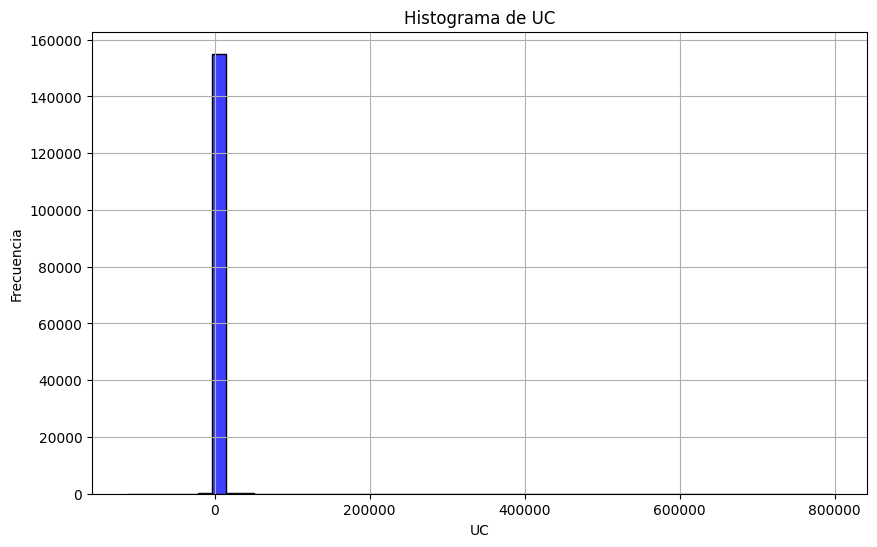

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['UC'], bins=50, kde=False, color='blue')
plt.title('Histograma de UC')
plt.xlabel('UC')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Se observa una gran cantidad de valores cercanos a 0 y algunos valores con cantidades muy altas, lo que indica una distribución con asimetría positiva. Posiblemente se deba a la presencia de valores atípicos.

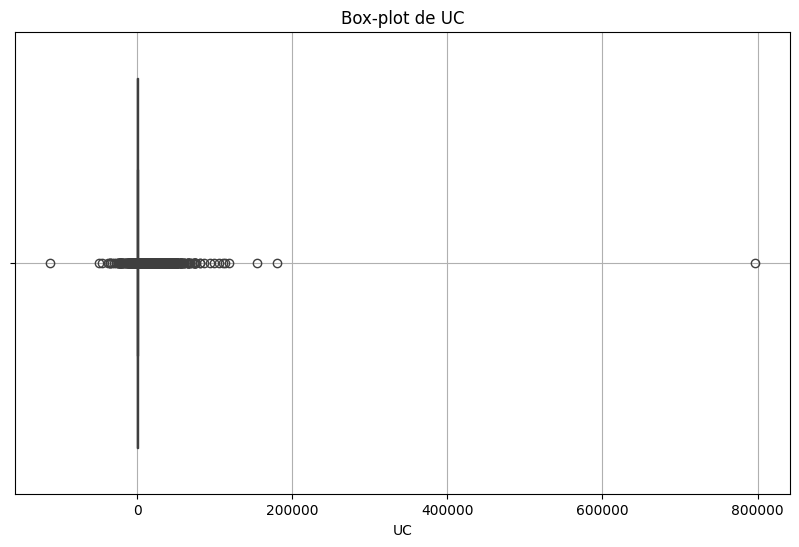

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['UC'])
plt.title('Box-plot de UC')
plt.xlabel('UC')
plt.grid(True)
plt.show()

Se observa una gran cantidad de valores atípicos y también se puede observar que existen valores negativos en la variable UC.

## 2.3 Análisis de valores atípicos

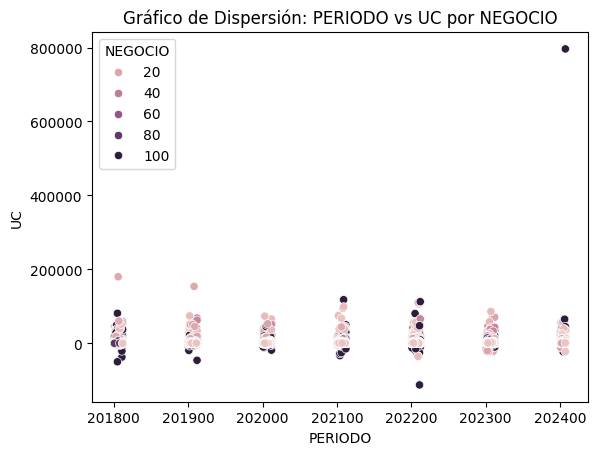

In [9]:
# Crear un gráfico de dispersión con diferentes colores por negocio
sns.scatterplot(x='PERIODO', y='UC', hue='NEGOCIO', data=df)
plt.title('Gráfico de Dispersión: PERIODO vs UC por NEGOCIO')
plt.show()

El gráfico de dispersión por negocio muestra que el negocio 100 es el que genera la mayor cantidad de valorea atípicos, este negocio corresponde al material POP, es decir artículos que no son medicamentos y que no son producidos por la empresa. Por esta razón se decide excluir de la muestra el negocio en mención.

In [10]:
# Se excluye el negocio 100
df = df[df['NEGOCIO'] != 100]
df.reset_index(drop=True, inplace=True)
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,NEGOCIO,LINEA,MARCA,ARTICULO,INVENTARIO,FACTOR_CIAL,UE,UC
0,odscol,201903,90,90,11,112,BLP,802521,SALIDAS,18,432,24
1,odscol,201903,90,90,7,71,07I,708874,SALIDAS,300,1800,6
2,odscol,201903,90,90,7,78,MT4,74221,SALIDAS,40,16520,413
3,odscol,201903,90,90,7,71,EZA,710321,SALIDAS MM,10,7550,755
4,odscol,201903,90,90,73,731,UNI,456704,SALIDAS,"0,04","10,48",262
...,...,...,...,...,...,...,...,...,...,...,...,...
119625,odsgtq,202103,32,32,7,70,DC3,3002478,SALIDAS MM,4,1672,418
119626,odsgtq,202107,32,32,7,70,DC3,3002478,SALIDAS MM,4,1944,486
119627,odsgtq,202203,32,32,7,70,DC3,3002478,SALIDAS MM,4,2040,510
119628,odsgtq,201911,32,32,7,70,IBO,3006050,SALIDAS MM,2,1064,532


# 3. Análisis de series de tiempo
Dado que el objetivo es pronosticar las Unidades Comerciales (UC) para cada mes de 2024, se requiere un análisis de series de tiempo. Este enfoque permitirá modelar y predecir la evolución de las UC a lo largo del tiempo, considerando patrones, tendencias y estacionalidad presentes en los datos históricos

## 3.1 Preparación de los datos

Se ha optado por excluir las columnas "NEGOCIO", "LINEA", "MARCA" y FACTOR_CIAL del análisis. Esta decisión se basa en que la información contenida en estas columnas se puede inferir o derivar a partir del código de "ARTICULO". De esta manera, se simplifica el análisis sin perder información relevante.

Las columna UE se puede calcular con las UC de acuerdo como se explica en la descripción de los datos.

In [11]:
#Se seleccionan solo las columnas necesarias
columnas =['ORIGEN','PERIODO','PAIS_ORIGEN','PAIS_DESTINO','ARTICULO','UC']
df = df[columnas]
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO,UC
0,odscol,201903,90,90,802521,24
1,odscol,201903,90,90,708874,6
2,odscol,201903,90,90,74221,413
3,odscol,201903,90,90,710321,755
4,odscol,201903,90,90,456704,262
...,...,...,...,...,...,...
119625,odsgtq,202103,32,32,3002478,418
119626,odsgtq,202107,32,32,3002478,486
119627,odsgtq,202203,32,32,3002478,510
119628,odsgtq,201911,32,32,3006050,532


In [12]:
# Se agrupan por UC
df = df.groupby(['ORIGEN','PERIODO','PAIS_ORIGEN','PAIS_DESTINO','ARTICULO'], as_index=False)['UC'].sum()
df.reset_index(drop=True, inplace=True)
df

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO,UC
0,odsbon,201811,28,28,3000205,116
1,odsbon,201811,28,28,3000212,221
2,odsbon,201811,28,28,3000960,283
3,odsbon,201811,28,28,3001260,148
4,odsbon,201811,28,28,3001277,0
...,...,...,...,...,...,...
119625,odssvc,202407,28,28,3003518,-22479
119626,odssvc,202407,28,28,3003532,5
119627,odssvc,202407,28,28,3003549,560
119628,odssvc,202407,28,28,3003648,0


In [13]:
# Se crea los valores unicos de las columnas excluyendo el PERIODO y la UC
df_unique = df[['ORIGEN','PAIS_ORIGEN','PAIS_DESTINO','ARTICULO']].drop_duplicates()
df_unique.reset_index(drop=True, inplace=True)
df_unique

,ORIGEN,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO
0,odsbon,28,28,3000205
1,odsbon,28,28,3000212
2,odsbon,28,28,3000960
3,odsbon,28,28,3001260
4,odsbon,28,28,3001277
...,...,...,...,...
8286,odssvc,28,28,3002416
8287,odssvc,28,28,3003433
8288,odssvc,28,28,3003518
8289,odssvc,28,28,3003648


In [14]:
# En una lista quedan consignados cada uno de los dataframe con las series que seran de estudio
dataframes_list =[]
for row in df_unique.itertuples():
    filtered_df = df[
        (df['ORIGEN'] == row.ORIGEN) &
        (df['PAIS_ORIGEN'] == row.PAIS_ORIGEN) &
        (df['PAIS_DESTINO'] == row.PAIS_DESTINO) &
        (df['ARTICULO'] == row.ARTICULO)
    ]
    # Añadir el DataFrame filtrado a la lista
    dataframes_list.append(filtered_df)

len(dataframes_list)

8291

Se obtienen 8291 series de tiempo

In [15]:
#Esta función genera una serie temporal completa desde enero de 2018 hasta diciembre de 2023.
#Los valores faltantes se reemplazan con cero, lo que indica que no hubo salidas de muestras médicas en esos periodos.

def preparar_series(df):
    df = df[['PERIODO','UC']]

    f_inicio = 201801#df.PERIODO.min()
    f_fin = 202312

    # Convertir a formato datetime
    fecha_inicio_dt = pd.to_datetime(f_inicio, format='%Y%m')
    fecha_fin_dt = pd.to_datetime(f_fin, format='%Y%m')

    # Crear un rango de fechas mensuales
    rango_fechas = pd.date_range(start=fecha_inicio_dt, end=fecha_fin_dt, freq='MS')

    # Crear el DataFrame
    df_fechas = pd.DataFrame(rango_fechas, columns=['PERIODO'])

    df_fechas['UC'] = 0

    # Convertir la columna 'PERIODO' a tipo datetime
    df.loc[:,'PERIODO'] =  pd.to_datetime(df['PERIODO'], format='%Y%m')

    #Se unen conservando el df de fechas (izquierda)
    df_merged = pd.merge(df_fechas, df, on='PERIODO', how='left')

    #Se completa con ceros
    df_merged['UC']=df_merged['UC_x'] + df_merged['UC_y']

    df_series = df_merged[['PERIODO','UC']]
    df_series.set_index('PERIODO', inplace=True)

    # Se rellenan los valores faltantes con cero
    df_series.loc[:,'UC'] = df_series['UC'].fillna(0)

    return df_series

## 3.1 Exploración de las series

In [16]:
#Explorando la primer serie de la lista
df_serie = dataframes_list[0]
df_serie

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO,UC
0,odsbon,201811,28,28,3000205,116
26,odsbon,201812,28,28,3000205,0
111,odsbon,201901,28,28,3000205,519
157,odsbon,201902,28,28,3000205,75
192,odsbon,201903,28,28,3000205,147
244,odsbon,201905,28,28,3000205,485
303,odsbon,201906,28,28,3000205,494
335,odsbon,201907,28,28,3000205,395
376,odsbon,201908,28,28,3000205,257
442,odsbon,201909,28,28,3000205,61


In [17]:
# Se convierte en un dataframe donde el indice unico es el periodo y la variable es las UC
df_p = preparar_series(df_serie)
df_p

,UC
PERIODO,
2018-01-01,0.0
2018-02-01,0.0
2018-03-01,0.0
2018-04-01,0.0
2018-05-01,0.0
...,...
2023-08-01,357.0
2023-09-01,357.0
2023-10-01,357.0


In [18]:
df_p.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72 entries, 2018-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UC      72 non-null     float64
dtypes: float64(1)
memory usage: 1.1 KB


Los siguientes gráficos muestran el comportamiento de la serie almacenada en la posición cero de la lista de series.

In [19]:
df_serie.head(1)

,ORIGEN,PERIODO,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO,UC
0,odsbon,201811,28,28,3000205,116


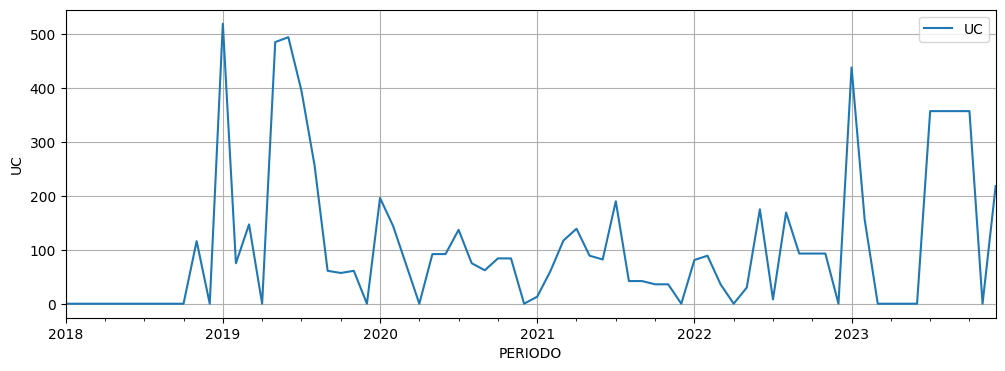

In [20]:
#Comportamiento de la serie en una gráfica de tiempo
ax = df_p.plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('UC');

<Axes: title={'center': 'UC'}, xlabel='Año'>

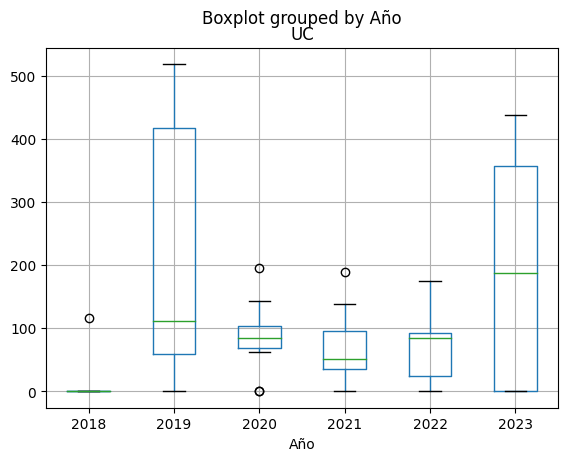

In [21]:
df_box =df_p.copy()
df_box['Año'] = df_box.index.year
df_box.boxplot(column='UC', by='Año')

In [22]:
#Calculando la media movil
df_p['media_movil'] = df_p['UC'].rolling(window=12).mean()
df_p.head(15)

,UC,media_movil
PERIODO,,
2018-01-01,0.0,NaN
2018-02-01,0.0,NaN
2018-03-01,0.0,NaN
2018-04-01,0.0,NaN
2018-05-01,0.0,NaN
2018-06-01,0.0,NaN
2018-07-01,0.0,NaN
2018-08-01,0.0,NaN
2018-09-01,0.0,NaN


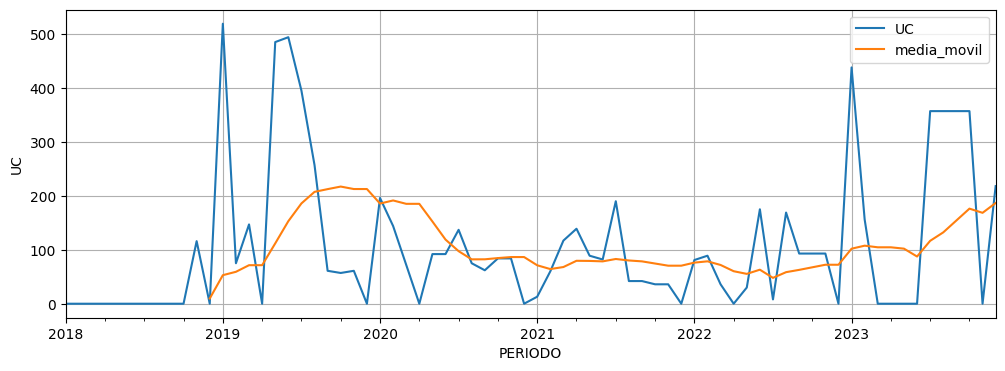

In [23]:
ax = df_p.plot(figsize=(12,4))
ax.grid()
ax.set_ylabel('UC');

## 3.3 Descomposición de las series
Se descomponen las series utilizando los metodos clasicos (aditivo y multiplicativo) y STL (Seasonal and Trend decomposition using Loess).

Como ejemplo se evalua la serie en la posición cero de la lista de series.

In [24]:
uc_comps_add = seasonal_decompose(df_p['UC'],model='additive')
print(f'Promedio residuales descomposición aditiva: {uc_comps_add.resid.mean()}')

Promedio residuales descomposición aditiva: -7.213888888888878


In [25]:
if (df_p['UC'] <= 0).any():
  print(f'Descartada la descomposición multiplicativa')
else:
  uc_comps_mult = seasonal_decompose(df_p['UC'],model='multiplicative')
  print(f'Promedio residuales descomposición multiplicativa: {uc_comps_mult.resid.mean()}')


Descartada la descomposición multiplicativa


In [26]:
# Realizar descomposición STL
uc_stl = STL(df_p['UC']).fit()
print(f'Promedio residuales descomposición STL: {uc_stl.resid.mean()}')

Promedio residuales descomposición STL: 1.6324353275619865


A continuación la función **selecionar_descomposicion** tiene como objetivo determinar el método de descomposición de series de tiempo más adecuado para un conjunto de datos específico. Recibe como entrada un DataFrame que contiene una serie de tiempo y evalúa tres métodos de descomposición: aditivo, multiplicativo y STL.

Para cada método, la función calcula el promedio de los residuos. El método con el promedio de residuos más bajo se considera el más adecuado, ya que indica un mejor ajuste a los datos. La función retorna una tupla con dos elementos:

1. Una letra que indica el método seleccionado ('a' para aditivo, 'm' para multiplicativo, 's' para STL).

2. El modelo de descomposición resultante, que se puede utilizar para realizar predicciones.

In [27]:
def selecionar_descomposicion(df):
  flag = True

  #Descomposición aditiva
  uc_comps_add = seasonal_decompose(df['UC'],model='additive')
  aditiva = abs(uc_comps_add.resid.mean())

  #Descomposición multiplicativa
  if (df['UC'] <= 0).any():
    flag =False
  else:
    uc_comps_mult = seasonal_decompose(df['UC'],model='multiplicative')
    multiplicativa = abs(uc_comps_mult.resid.mean())

  #Descomposición STL
  uc_stl = STL(df['UC']).fit()
  stl = abs(uc_stl.resid.mean())

  if (flag):
    if (aditiva > multiplicativa):
       if (multiplicativa > stl):
         return 's',uc_stl
       else:
         return 'm',uc_comps_mult
    else:
      if (aditiva > stl):
        return 's',uc_stl
      else:
        return 'a',uc_comps_add
  else:
      if (aditiva > stl):
        return 's',uc_stl
      else:
        return 'a',uc_comps_add


In [28]:
metodo, modelo = selecionar_descomposicion(df_p)
print(f'Método seleccionado: {metodo}')

Método seleccionado: s


El siguiente paso en el análisis consiste en crear un DataFrame que almacene la siguiente información para cada serie de tiempo:

1. Método de descomposición: El método seleccionado para la serie (aditivo, multiplicativo o STL).

2. Modelo de descomposición: El modelo resultante de la descomposición.

3. Combinación única: La combinación de origen, país de origen, país de destino y artículo que identifica la serie.
Este DataFrame permitirá acceder fácilmente a la información necesaria para construir los modelos de predicción para cada serie de tiempo.

In [29]:

limite = 15
i= 0
lista = []
df_l = pd.DataFrame()
for d in dataframes_list:
  df_temp = preparar_series(d)
  metodo, modelo = selecionar_descomposicion(df_temp)

  ddf = dataframes_list[i][['ORIGEN','PAIS_ORIGEN','PAIS_DESTINO','ARTICULO']].drop_duplicates()

  l = [i, metodo, modelo, ddf]
  lista.append(l)
  dd = pd.DataFrame([{'pos':i,
        'metodo':metodo,
        'modelo':modelo,
        'df': ddf
  }])
  df_l = pd.concat([df_l,dd], ignore_index=True)
  #if metodo == 'a':
  #  print(f'{i} Método seleccionado: {metodo}')
  if i == limite:
    break
  i+=1

In [30]:
# Metodo resultado
lista[0][1]

's'

In [31]:
#Dataframe con los valores unicos
lista[0][3]

,ORIGEN,PAIS_ORIGEN,PAIS_DESTINO,ARTICULO
0,odsbon,28,28,3000205


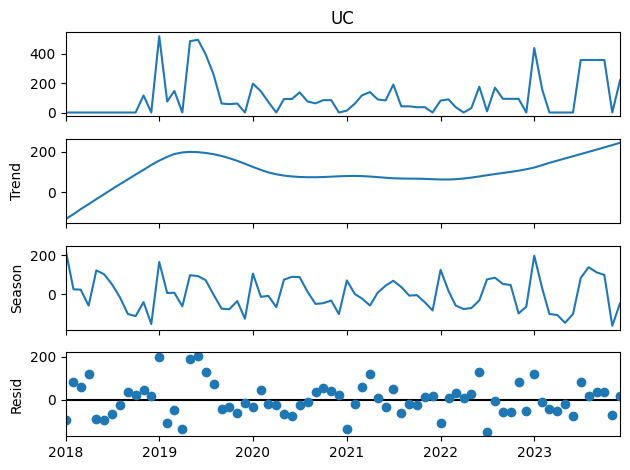

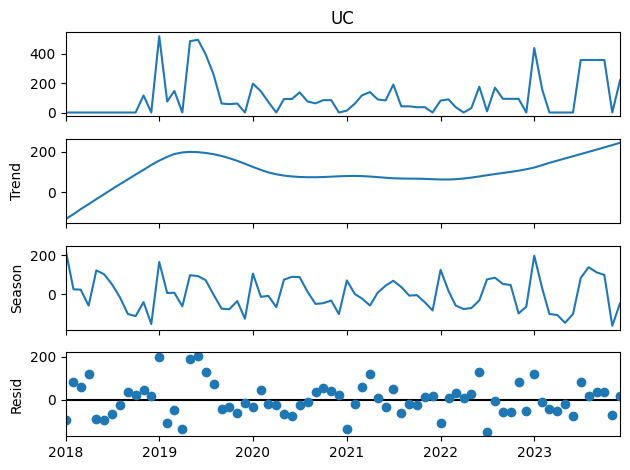

In [32]:
#Utilizando la funcionalidad del modelo para graficar su descomposición
lista[0][2].plot()

# 4. Conclusiones

El análisis exploratorio de datos realizado hasta el momento revela información importante sobre la producción de muestras médicas:

* **Valores atípicos:** Se identificaron valores atípicos en la variable
objetivo "UC", principalmente asociados al negocio 100 (material POP). Estos valores fueron excluidos del análisis para evitar distorsiones.

* **Series de tiempo:** Se realizó un análisis de series de tiempo para cada combinación única de origen, país de origen, país de destino y artículo. Se definió una función para determinar el método de descomposición más adecuado (aditivo, multiplicativo o STL) para cada serie.

* **Próximos pasos:** El siguiente paso sería construir modelos de predicción para cada serie de tiempo utilizando el método de descomposición seleccionado. Estos modelos permitirán estimar la cantidad de unidades comerciales (UC) a producir mensualmente en 2024 para garantizar la disponibilidad de muestras médicas.